

A. BINARY LABELED DATA



####ví dụ a1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(12)
means = [[0, 3], [2, 0]]
cov1 = [[1, 0.3], [0.3, 1]]
cov2 = [[1, 0.2], [0.2, 1.5]]
N1 = 50
N2 = 40
N = N1 + N2
X1 = np.random.multivariate_normal(means[0], cov1, N1) # each row is a data point
X2 = np.random.multivariate_normal(means[1], cov2, N2)
# Combine classes and create labels
X = np.vstack((X1, X2))
y = np.hstack((np. ones(50), 2*np.ones(40)))

Number of samples in Class 1: 50
Number of samples in Class 2: 40
Mean of Class 1: [0.2041277  3.04666639]
Mean of Class 2: [ 1.80478915 -0.18249896]


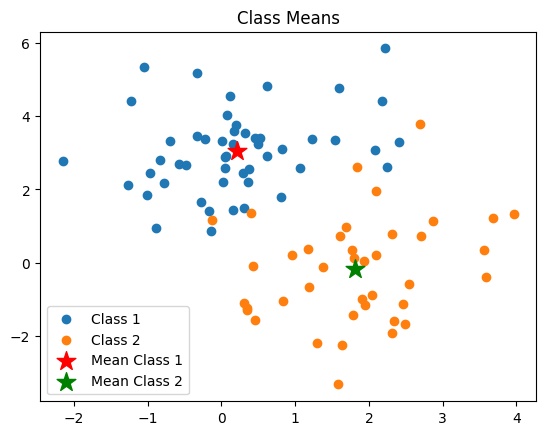

In [ ]:
# Separate data by class to class1 (y=0) and class2 (y=1)
class1 = X[y == 1]
class2 = X[y == 2]
print("Number of samples in Class 1:", class1.shape[0])
print("Number of samples in Class 2:", class2.shape[0])
# Calculate class means
mean1 = np.mean(class1, axis=0)
mean2 = np.mean(class2, axis=0)
print("Mean of Class 1:", mean1)
print("Mean of Class 2:", mean2)
# Visualize class means
plt.scatter(class1[:, 0], class1[:, 1], label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], label='Class 2')
plt.scatter(mean1[0], mean1[1], color='red', s=200, marker='*', label='Mean Class 1')
plt.scatter(mean2[0], mean2[1], color='green', s=200, marker='*', label='Mean Class 2')
plt.legend()
plt.title('Class Means')
plt.show()

In [ ]:
# Build S_B
m1 = np.mean(X1.T, axis = 1, keepdims = True)
m2 = np.mean(X2.T, axis = 1, keepdims = True)
a = (m2 - m1)
S_B = a.dot(a.T)
# Build S_W
SW1 = X1.T - np.tile(m1, (1, N1))
SW2 = X2.T - np.tile(m2, (1, N2))
S_W = SW1.dot(SW1.T) + SW2.dot(SW2.T)
print('Between-class covariance matrix: S_B =\n', S_B)
print('Within-class covariance matrix: S_W =\n',S_W)

Between-class covariance matrix: S_B =
 [[ 2.56211707 -5.16880049]
 [-5.16880049 10.42750887]]
Within-class covariance matrix: S_W =
 [[ 86.83642101  27.51782236]
 [ 27.51782236 140.23997255]]


In [ ]:
L, W = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
w = W[:, 0]
print(w)
print(w.shape)

[-0.89596689 -0.44412085]
(2,)


(50,) (2,)
(2, 50) (2, 40)


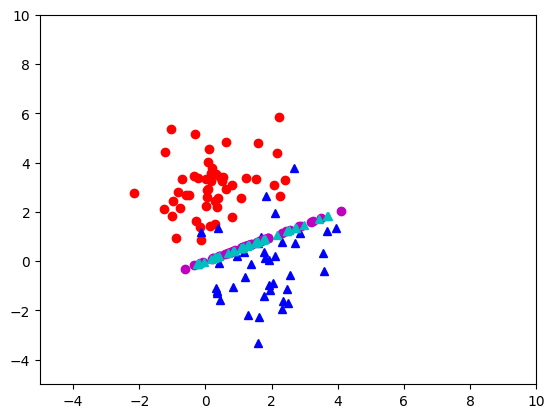

In [ ]:
# Visualize data
plt.plot(X1[:, 0], X1[:, 1], 'ro')
plt.plot(X2[:, 0], X2[:, 1], 'b^')
plt.axis([-5, 10, -5, 10])
#Compute projections of data points on to LDA's dimention
#
norm_W = w.T.dot(w)
X1_tmp = X1.dot(w)/norm_W
X2_tmp = X2.dot(w)/norm_W
print(X1_tmp.shape, w.shape)
X1_p = np.multiply(w.reshape(2,1), X1_tmp.T)
X2_p = np.multiply(w.reshape(2,1), X2_tmp.T)
print(X1_p.shape,X2_p.shape)
#Draw projected points
plt.plot(X1_p[0, :], X1_p[1, :], 'mo')
plt.plot(X2_p[0, :], X2_p[1, :], 'c^')
plt.show()

######Sử dụng sklearn

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# Initialize LDA and fit the model
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

####ví dụ 2 (Bài tập thực hành 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

######1.

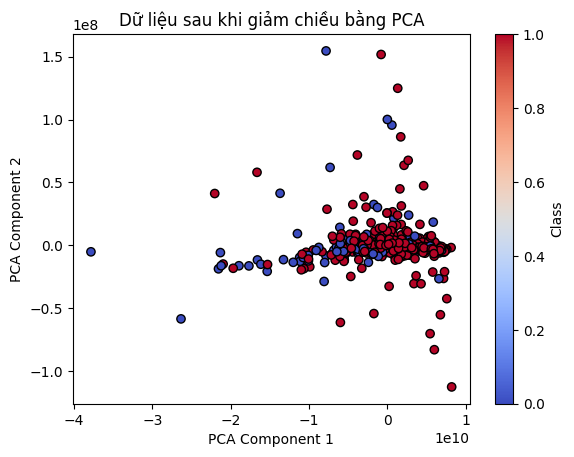

In [ ]:
data = pd.read_csv("/content/pd_speech_features.csv")

# Tách dữ liệu X và y
X = data.drop(columns=['id', 'class'])  # Bỏ cột 'id'
y = data['class']

# Chia tập dữ liệu thành Train (500) và Test (256)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=500, random_state=42)

# Giảm chiều dữ liệu xuống 2 bằng PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)
# Hiển thị dữ liệu sau khi giảm chiều bằng PCA
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Dữ liệu sau khi giảm chiều bằng PCA')
plt.colorbar(label='Class')
plt.show()

######2.

In [ ]:
# Giảm chiều dữ liệu xuống 1 bằng LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda_train = lda.fit_transform(X_train, y_train)
X_lda_test = lda.transform(X_test)

# Mô hình phân loại với dữ liệu đã giảm chiều bằng PCA
model_pca = GaussianNB()
model_pca.fit(X_pca_train, y_train)
y_pred_pca = model_pca.predict(X_pca_test)
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f'Accuracy with PCA: {acc_pca:.4f}')

# Mô hình phân loại với dữ liệu đã giảm chiều bằng LDA
model_lda = GaussianNB()
model_lda.fit(X_lda_train, y_train)
y_pred_lda = model_lda.predict(X_lda_test)
acc_lda = accuracy_score(y_test, y_pred_lda)
print(f'Accuracy with LDA: {acc_lda:.4f}')


Accuracy with PCA: 0.7031
Accuracy with LDA: 0.6758


In [ ]:
# Phân loại dữ liệu gốc với Naïve Bayes và Logistic Regression
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.25, random_state=42)

# Naïve Bayes trên dữ liệu gốc
nb_model = GaussianNB()
nb_model.fit(X_train_full, y_train_full)
y_pred_nb = nb_model.predict(X_test_full)
acc_nb = accuracy_score(y_test_full, y_pred_nb)
print(f'Accuracy with Naïve Bayes (Raw Data): {acc_nb:.4f}')

# Logistic Regression trên dữ liệu gốc
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_full, y_train_full)
y_pred_lr = log_reg.predict(X_test_full)
acc_lr = accuracy_score(y_test_full, y_pred_lr)
print(f'Accuracy with Logistic Regression (Raw Data): {acc_lr:.4f}')

Accuracy with Naïve Bayes (Raw Data): 0.6772
Accuracy with Logistic Regression (Raw Data): 0.7407


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Naïve Bayes trên dữ liệu đã giảm chiều (PCA)
nb_model.fit(X_pca_train, y_train)
y_pred_nb_pca = nb_model.predict(X_pca_test)
acc_nb_pca = accuracy_score(y_test, y_pred_nb_pca)
print(f'Accuracy with Naïve Bayes (PCA Data): {acc_nb_pca:.4f}')

# Logistic Regression trên dữ liệu đã giảm chiều (PCA)
log_reg.fit(X_pca_train, y_train)
y_pred_lr_pca = log_reg.predict(X_pca_test)
acc_lr_pca = accuracy_score(y_test, y_pred_lr_pca)
print(f'Accuracy with Logistic Regression (PCA Data): {acc_lr_pca:.4f}')

Accuracy with Naïve Bayes (PCA Data): 0.7031
Accuracy with Logistic Regression (PCA Data): 0.6094


In [ ]:
# So sánh tác động của giảm chiều lên độ chính xác
print("\nSo sánh tác động của giảm chiều lên độ chính xác:")
print(f'Naïve Bayes giảm từ {acc_nb:.4f} (gốc) xuống {acc_nb_pca:.4f} (PCA)')
print(f'Logistic Regression giảm từ {acc_lr:.4f} (gốc) xuống {acc_lr_pca:.4f} (PCA)')


So sánh tác động của giảm chiều lên độ chính xác:
Naïve Bayes giảm từ 0.6772 (gốc) xuống 0.7031 (PCA)
Logistic Regression giảm từ 0.7407 (gốc) xuống 0.6094 (PCA)


B. LDA FOR MULTINOMIAL DATA

####ví dụ 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
# Load Iris dataset
iris = load_iris()
X = iris.data
Y = iris.target
label_dict = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}

In [ ]:
np.set_printoptions(precision = 4)
mean_vectors = []
for cl in range(0,3):
  mean_vectors.append(np.mean(X[Y==cl], axis=0))

In [ ]:
print('Mean vector of class', cl+1, mean_vectors[cl],'.T')

Mean vector of class 3 [6.588 2.974 5.552 2.026] .T


In [ ]:
S_W = np.zeros((4,4))
for cl, mv in zip(range(0, 3), mean_vectors):
  class_sc_mat = np.zeros((4,4))
  for row in X[Y == cl]: # Corrected indentation: this line should be aligned with the 'class_sc_mat' line
    row = row.reshape(4, 1)
    mv = mv.reshape(4, 1)
    class_sc_mat += (row - mv).dot((row -mv).T)
  S_W += class_sc_mat # Corrected indentation: this line should also be aligned with the 'class_sc_mat' line
print(S_W)

[[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


In [ ]:
#the calculate the overall mean with a simple function
overall_mean = np.mean(X, axis = 0)
#initialize zeros mnatrix
S_B = np.zeros((4,4))
#For every iteration in the mean vectors
for cl,mean_vec in enumerate(mean_vectors):
    #Extracting the number of samples per class, in this case, 50
    n = X[Y==cl,:].shape[0]
    #Reshaping matrices from 1x4 to 4x1 for better manipulation
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = overall_mean.reshape(4,1)
    #Applying the equation
    S_B += n * (mean_vec - overall_mean) .dot((mean_vec - overall_mean).T)
print(S_B)

[[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
for i in range(len(eigenvalues)):
    eigenvectors_sc = eigenvectors[:,i].reshape(4,1)
    print("\nEigenvector {}: \n{}".format(i+1, eigenvectors_sc.real))
    print("Eigenvalue {:}: {:.2e}".format(i+1, eigenvalues[i].real))


Eigenvector 1: 
[[-0.2087]
 [-0.3862]
 [ 0.554 ]
 [ 0.7074]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[-0.1416]
 [-0.2125]
 [-0.2703]
 [ 0.6927]]
Eigenvalue 3: -2.89e-15

Eigenvector 4: 
[[-0.1416]
 [-0.2125]
 [-0.2703]
 [ 0.6927]]
Eigenvalue 4: -2.89e-15


In [ ]:
#List of every eigenvector and its corresponding eigenvalue
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]
#Sorting in descending order
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse = True)
print("Eigenvalues in decreasing order: \n")
for i in eigen_pairs:
    print (i[0]) # Indented this line
print("Variance Explained: \n")
eigenvalues_sum = sum(eigenvalues)
for i,j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format(i+1, (j[0]/eigenvalues_sum).real)) # Indented this line

Eigenvalues in decreasing order: 

32.191929198278025
0.28539104262306647
3.7355530009793716e-15
3.7355530009793716e-15
Variance Explained: 

Eigenvalue 1:  99.12%
Eigenvalue 2:  0.88%
Eigenvalue 3:  0.00%
Eigenvalue 4:  0.00%


In [ ]:
W = np.hstack((eigen_pairs[0][1].reshape(4,1), eigen_pairs[1][1].reshape(4,1)))
print("Matrix W:\n",W.real)

Matrix W:
 [[-0.2087 -0.0065]
 [-0.3862 -0.5866]
 [ 0.554   0.2526]
 [ 0.7074 -0.7695]]


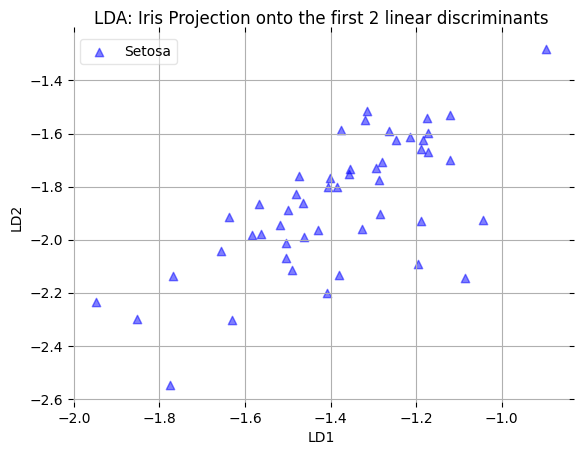

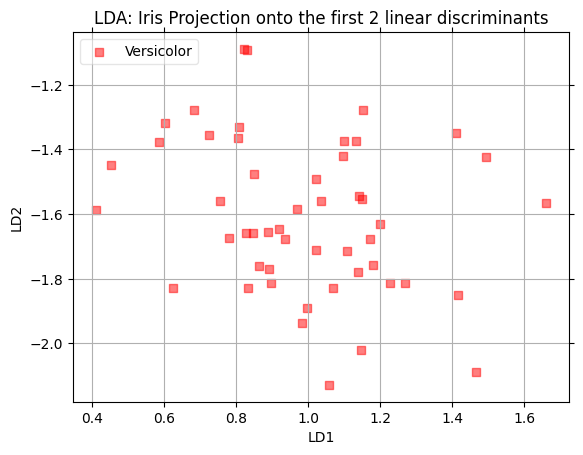

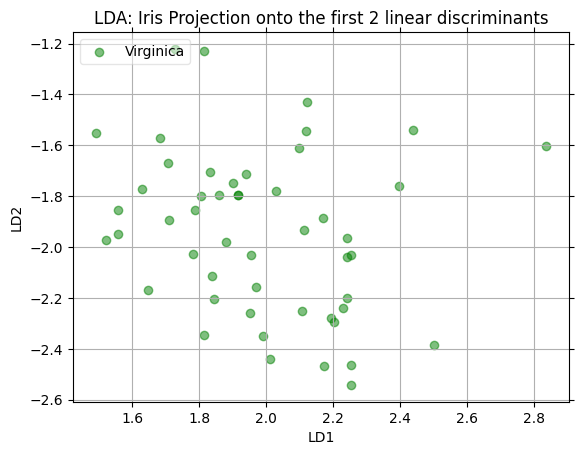

In [ ]:
X_lda= X.dot (W)
#will throw an error in case the dot product has made an error assert
X_lda.shape == (150,2), "The matrix is not 150x2 dimensional"
def plot_step_lda():
    # Indented the code block within the function
    ax = plt.subplot(111)
    for label, marker, color in zip(range(0,3), ("^", "s", "o"), ("blue", "red", "green")):
        plt.scatter (x = X_lda[:,0].real [Y== label],
                    y= X_lda[:,1].real [Y ==label],
                    marker = marker,
                    color =color,
                    alpha = 0.5,
                    label = label_dict[label])
        plt.xlabel("LD1")
        plt.ylabel("LD2")
        leg = plt.legend (loc= "upper left", fancybox = True)
        leg.get_frame().set_alpha (0.5)
        plt.title("LDA: Iris Projection onto the first 2 linear discriminants")
        plt.tick_params (axis="both", which = "both", bottom = "off", top = "off",
                        labelbottom = "on", left = "off", right= "off", labelleft = "on")
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible (False)
        ax.spines["bottom"].set_visible (False)
        ax.spines["left"].set_visible (False)
        plt.grid()
        plt.tight_layout
        plt.show()
plot_step_lda()

######Dùng sklearn

explained variance ratio (first two components): [0.9246 0.0531]


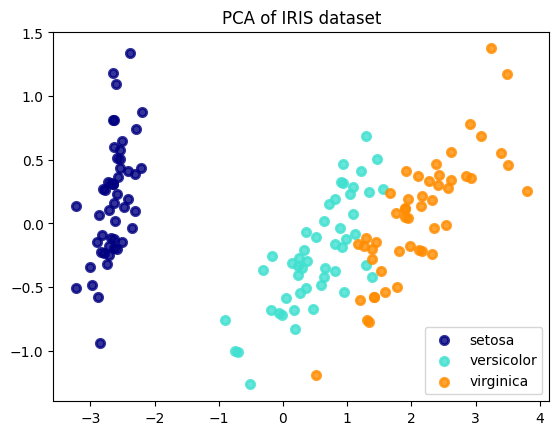

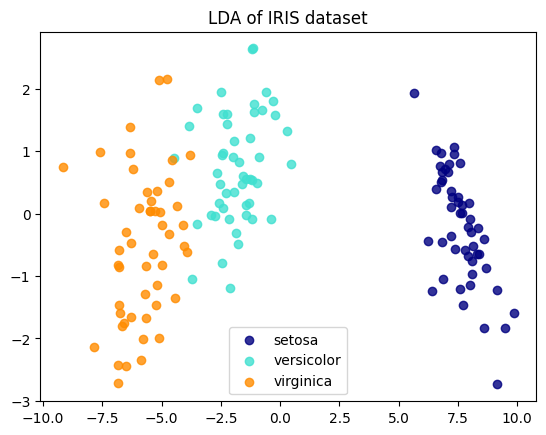

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    ) # This line was not indented and caused the IndentationError
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")
plt.show()

####Yêu cầu thực hành

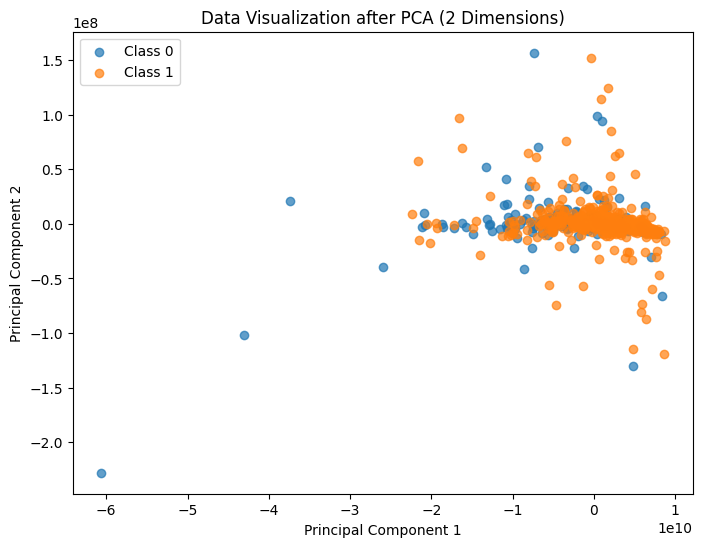

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv("/content/pd_speech_features.csv")
X = data.drop(columns=['id', 'class'])
y = data['class']

# Giảm chiều về 2 sử dụng pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# trực quan
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Class 0', alpha=0.7)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Class 1', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Visualization after PCA (2 Dimensions)')
plt.legend()
plt.show()

In [ ]:
# chia dữ liệu thành train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Logistic Regression với dữ liệu ban đầu
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# dự đoán và đánh giá
y_pred = log_reg.predict(X_test)
acc_original = accuracy_score(y_test, y_pred)
cm_original = confusion_matrix(y_test, y_pred)

print(f'Accuracy (Original Data): {acc_original:.4f}')
print(f'Confusion Matrix (Original Data):\n{cm_original}')

Accuracy (Original Data): 0.7500
Confusion Matrix (Original Data):
[[  8  31]
 [  7 106]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# giảm xuống 2 chiều sử dụng pca
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Logistic Regression trên dữ liệu đã giảm chiều
log_reg_pca = LogisticRegression(max_iter=1000)
log_reg_pca.fit(X_train_pca, y_train)

# dự đoán và đánh giá
y_pred_pca = log_reg_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
cm_pca = confusion_matrix(y_test, y_pred_pca)

print(f'Accuracy (PCA): {acc_pca:.4f}')
print(f'Confusion Matrix (PCA):\n{cm_pca}')

Accuracy (PCA): 0.6645
Confusion Matrix (PCA):
[[22 17]
 [34 79]]


####Ví dụ B2 (Bài tập thực hành 2)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time


data = pd.read_csv('/content/mnist_train.csv')

# chọn mẫu ngẫu nhiên 5000 ảnh
data_sample = data.sample(n=5000, random_state=42)

# lấy ra x data và nhãn y
X = data_sample.drop(columns=['label'])
y = data_sample['label']

# giảm chiều pca còn 100 chiều
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

print("Original data shape:", X.shape)
print("PCA reduced data shape:", X_pca.shape)

Original data shape: (5000, 784)
PCA reduced data shape: (5000, 100)


In [ ]:
# chia train test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Multinomial Logistic Regression trên dữ liệu gốc
start_time = time.time()
log_reg_original = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg_original.fit(X_train, y_train)
end_time = time.time()

# dự đoán và đánh giá mô hình
y_pred_original = log_reg_original.predict(X_val)
acc_original = accuracy_score(y_val, y_pred_original)

print(f'Accuracy (Original Data): {acc_original:.4f}')
print(f'Training time (Original Data): {end_time - start_time:.2f} seconds')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy (Original Data): 0.8733
Training time (Original Data): 2.25 seconds


In [ ]:
# chia dữ liệu thành train test
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Multinomial Logistic Regression trên dữ liệu giảm chiều pca
start_time = time.time()
log_reg_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg_pca.fit(X_train_pca, y_train_pca)
end_time = time.time()

# dự đoán và đánh giá mô hình
y_pred_pca = log_reg_pca.predict(X_val_pca)
acc_pca = accuracy_score(y_val_pca, y_pred_pca)

print(f'Accuracy (PCA): {acc_pca:.4f}')
print(f'Training time (PCA): {end_time - start_time:.2f} seconds')

#giảm chiều lda còn 8 chiều
lda = LinearDiscriminantAnalysis(n_components=8)
X_lda = lda.fit_transform(X, y)

# chia dữ liệu thành train, test và val
X_train_lda, X_val_lda, y_train_lda, y_val_lda = train_test_split(X_lda, y, test_size=0.3, random_state=42)

# Multinomial Logistic Regression trên dữ liệu đã giảm chiều lda
start_time = time.time()
log_reg_lda = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg_lda.fit(X_train_lda, y_train_lda)
end_time = time.time()

# dự đoán và đánh giá
y_pred_lda = log_reg_lda.predict(X_val_lda)
acc_lda = accuracy_score(y_val_lda, y_pred_lda)

print(f'Accuracy (LDA): {acc_lda:.4f}')
print(f'Training time (LDA): {end_time - start_time:.2f} seconds')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (PCA): 0.8400
Training time (PCA): 10.84 seconds
Accuracy (LDA): 0.9173
Training time (LDA): 0.08 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
